# Introduction
This notebook analyzes the fundamental limitations of LSTMs by systematically examining their architecture through multiple analytical lenses. Each limitation is derived directly from the underlying mathematical formulation rather than empirical observation.

# 1. Gradient Lens:
In LSTM, the gradient flowing through the cell state is controlled by the forget gate.
Because the forget gate output is between 0 and 1, gradients do not explode along this path.
However, since gradients are multiplied across many timesteps, they can still gradually shrink.
LSTM reduces the vanishing gradient problem but does not completely solve it, especially for very long sequences.

# 2. Compression Lens:
In an LSTM, all past information is stored in a fixed-size cell state.
At every timestep, old memory is scaled down and new information is added.
Because the memory size is fixed, the model must repeatedly compress past information to make room for new inputs.
As time passes, earlier information becomes increasingly mixed and weakened, making precise retrieval difficult for long sequences.
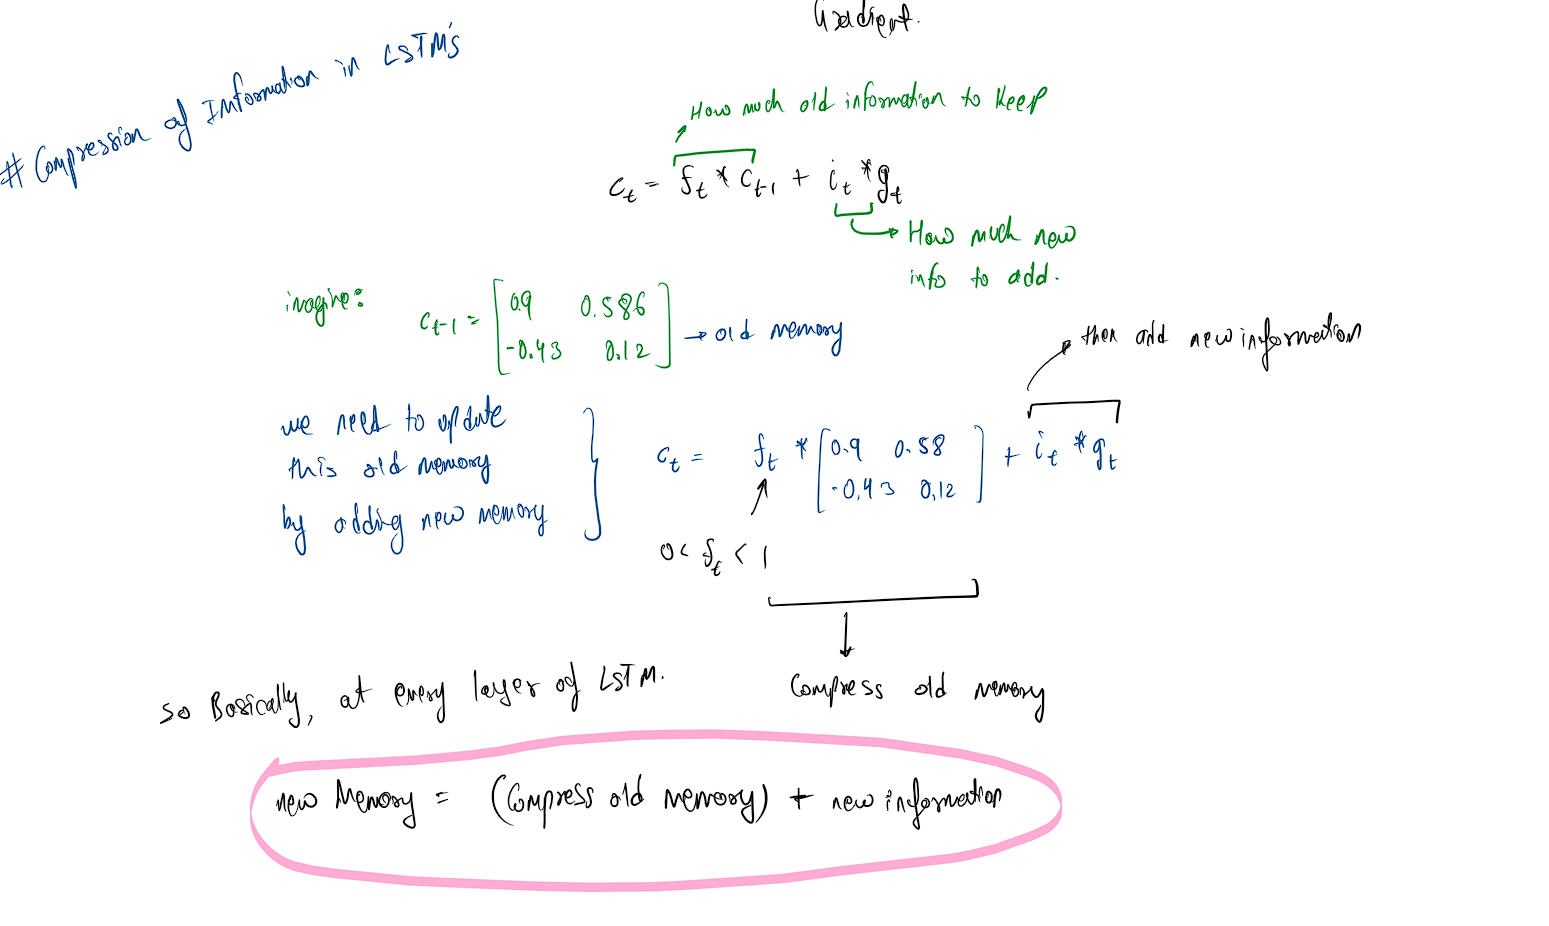

# 3. Temporal locality:
In LSTMs, the importance of information is determined at the moment it enters memory through the input and forget gates.
The memory update rule: 
         new_memory ​= forget_gate * old_memory + input_gate * ​candidate_cell_state

shows that decisions about what to retain or suppress are made using only past and current context.
Once the cell state is updated, earlier memory states are no longer accessible in their original form.
As a result, the model cannot later revise how strongly a past piece of information should have been stored when new context becomes available.
This creates a temporal locality constraint: memory importance is decided locally in time, while the need for that information may only become clear much later in the sequence.

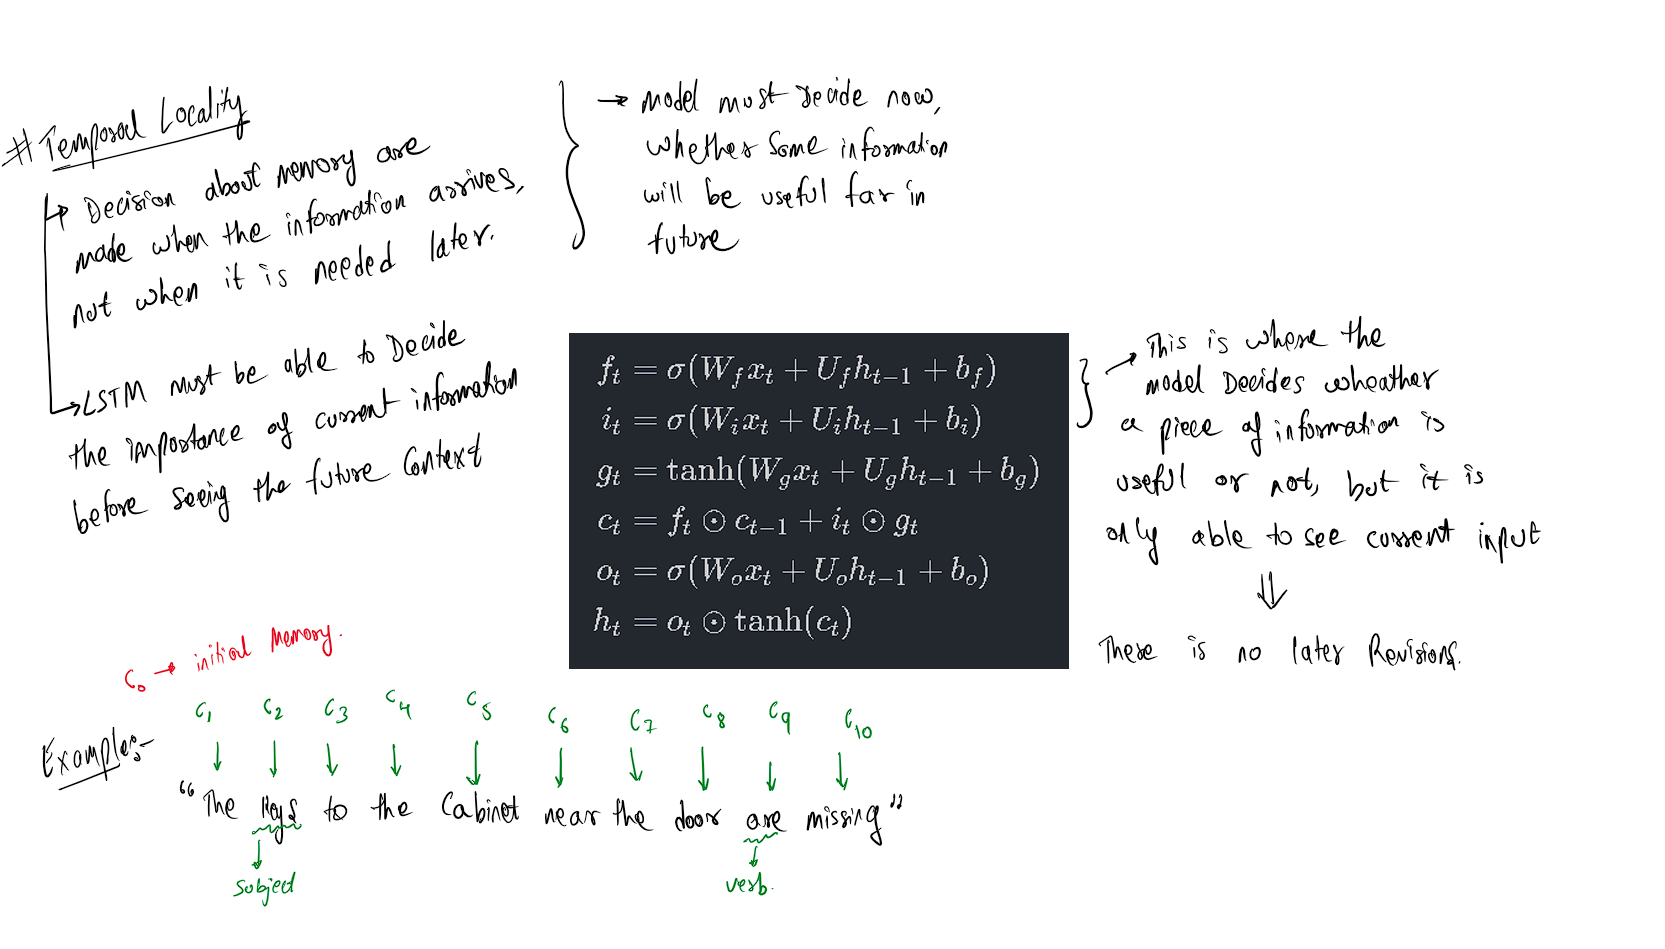
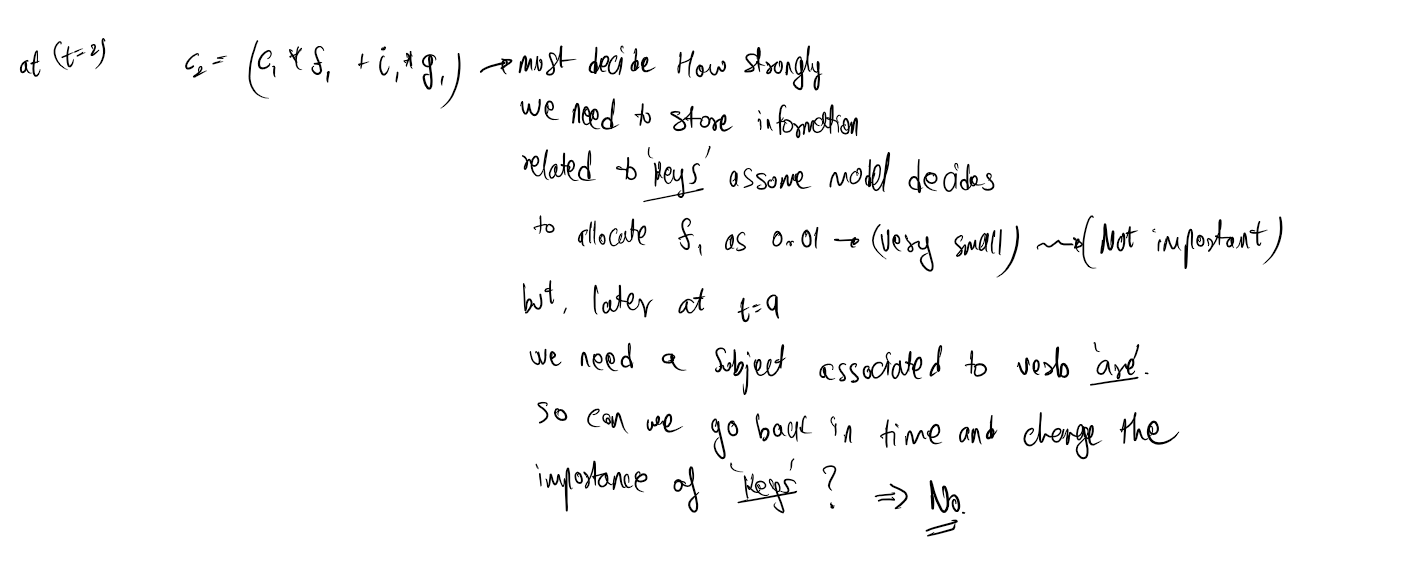
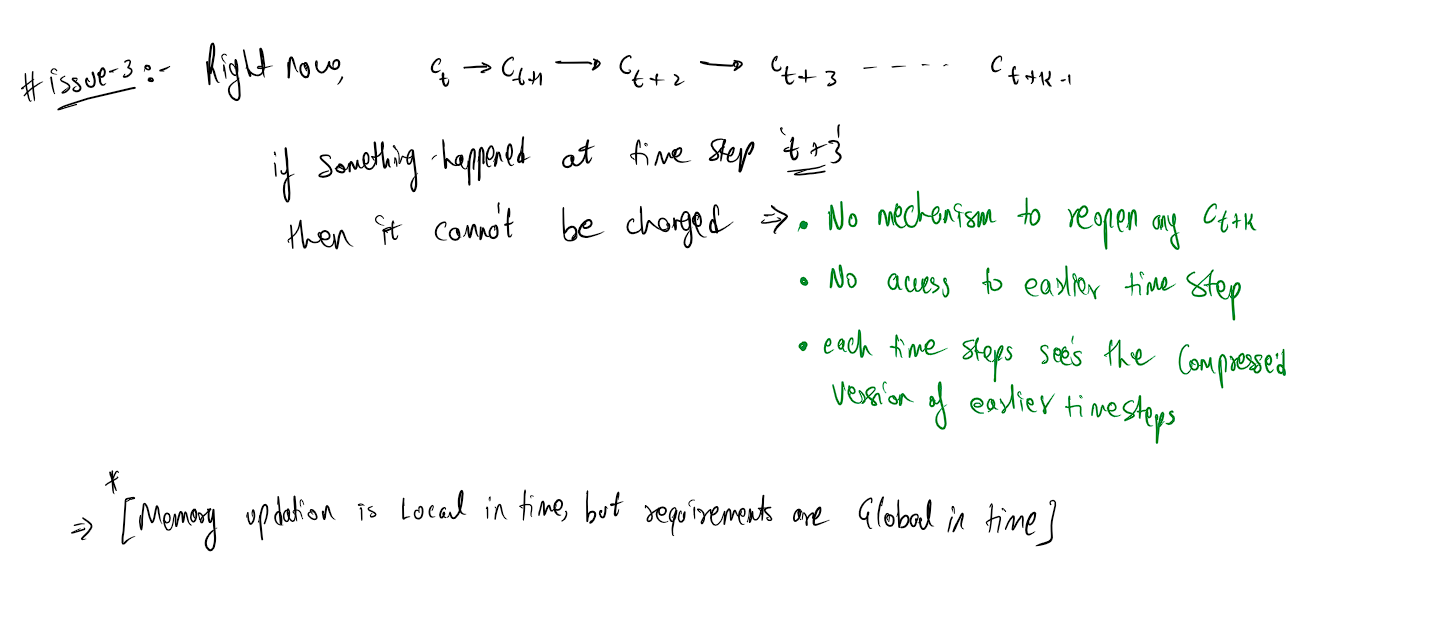

# 4. Credit Assignment:
In an LSTM, prediction error is computed at a specific timestep, but the hidden and cell states used for that prediction are compressed mixtures of all previous inputs.
During backpropagation, the gradient flows backward through this mixed memory rather than through individual token representations.
As a result, the error signal is distributed across many past timesteps and scaled only by temporal distance, not by semantic relevance.
Because past inputs are not stored in a token-wise manner, the model cannot precisely identify which specific input caused the prediction error.

# 5. Representational Bias Lens
An LSTM has a strong representational bias toward sequential patterns because it processes inputs one timestep at a time using the same transition function.
At each step, past information is compressed into a fixed-size hidden and cell state, forcing all structure to be represented as a linear sequence.
While this bias works well for local, order-based patterns, it is poorly suited for hierarchical structures such as grammar, which require nested and long-range relationships.
Since LSTMs do not explicitly represent hierarchy or role-based structure, grammatical information must be encoded indirectly within the evolving state, making it difficult to learn and maintain reliably over long sequences.

# 6. Memory Access Lens
In an LSTM, the only long-term memory is the cell state $𝑐_{𝑡}$
Memory is read through the hidden state,

hidden_state = output_gate * $tanh(𝑐_{𝑡})$

which exposes the entire memory vector at once, modulated only by the output gate.
Memory is updated at the same timestep using

$𝑐_{𝑡}$​ = forget_gate​ ⋅ prev_memory ​+ new information

Since memory reading and writing are inseparable, accessing memory necessarily modifies it.
Moreover, the model cannot selectively access specific parts of memory or retrieve information from a particular past timestep, as there is no addressing or indexing mechanism.
As a result, LSTMs lack selective recall and can only operate on a globally mixed memory representation.

# 7. Computational scaling Lens
The core recurrence in LSTM,

$c_{t}$ = forget_gate ​⋅ $c_{t-1}$ + new_information

enforces a strict sequential dependency across timesteps.
To compute the state at timestep t, all previous timesteps must be processed in order, preventing parallel computation across time.
As sequence length increases, both training and inference time grow linearly, making long sequences computationally expensive.
In practice, this forces the use of truncated sequences or limited context windows, which restricts the model’s exposure to long-range dependencies.
As a result, LSTMs face inherent scalability limitations when modeling long sequences, particularly in language tasks that require extended context.